# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_data = pd. merge(mouse_metadata,study_results, how='outer',on='Mouse ID')


# Display the data table for preview
print(combined_mouse_study_data)

SyntaxError: invalid syntax (520663858.py, line 5)

In [2]:
# Checking the number of mice.
count = len(pd.unique(combined_mouse_study_data['Mouse ID']))
  
print(count)        

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
listdupind = []

duplicaterows = combined_mouse_study_data[combined_mouse_study_data.duplicated(["Mouse ID","Timepoint"])]

listdupind = list(duplicaterows.index.values)

print(duplicaterows)
len(duplicaterows)
# print(listdupind)




    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


5

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmouseid = duplicaterows.at[listdupind[1],"Mouse ID"]
print(dupmouseid)

dupmouse = combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID']==dupmouseid]
print(dupmouse)



g989
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26  

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined_mouse_study_data.drop(combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID']==dupmouseid].index)
print(clean_combined)


     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
1        k403     Ramicane    Male          21          16          5   
2        k403     Ramicane    Male          21          16         10   
3        k403     Ramicane    Male          21          16         15   
4        k403     Ramicane    Male          21          16         20   
5        k403     Ramicane    Male          21          16         25   
6        k403     Ramicane    Male          21          16         30   
7        k403     Ramicane    Male          21          16         35   
8        k403     Ramicane    Male          21          16         40   
9        k403     Ramicane    Male          21          16         45   
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3     

In [6]:
# Checking the number of mice in the clean DataFrame.
count = len(pd.unique(clean_combined['Mouse ID']))
  
print(count)        

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

meancleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# print(meancleantumvol)

mediancleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# print(mediancleantumvol)

varcleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# print(varcleantumvol)

stddevcleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# print(stddevcleantumvol)

semcleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# print(semcleantumvol)

# tumorvolbyregimen = pd.merge(meancleantumvol,mediancleantumvol,how='outer',on='Drug Regimen',suffixes="mean","median")
# tumorvolbyregimen = pd.merge(tumorvolbyregimen,varcleantumvol,how='outer',on='Drug Regimen',suffixes=None,'variance')
# tumorvolbyregimen = pd.merge(tumorvolbyregimen,stddevcleantumvol,how='outer',on='Drug Regimen',suffixes=None,'Standard Deviation')
# tumorvolbyregimen = pd.merge(tumorvolbyregimen,semcleantumvol,how='outer',on='Drug Regimen',suffixes=None,'Standard Error of the Mean')
tumorvolbyregimen = pd.merge(meancleantumvol,mediancleantumvol,how='outer',on='Drug Regimen')
tumorvolbyregimen = pd.merge(tumorvolbyregimen,varcleantumvol,how='left',on='Drug Regimen')
tumorvolbyregimen = pd.merge(tumorvolbyregimen,stddevcleantumvol,how='left',on='Drug Regimen')
tumorvolbyregimen = pd.merge(tumorvolbyregimen,semcleantumvol,how='left',on='Drug Regimen')
tumorvolbyregimen.columns = ["Mean of Tumor Volume (mm3)","Median of Tumor Volume (mm3)","Variance of Tumor Volume (mm3)","Standard Deviation of Tumor Volume (mm3)", "Standard Error of Mean of Tumor Volume (mm3)"]
tumorvolbyregimen.columns = ["Mean","Median","Var","StDev", "SEM"]
pprint(tumorvolbyregimen)



                   Mean     Median        Var     StDev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_combined.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'No. of Timepoints Recorded')

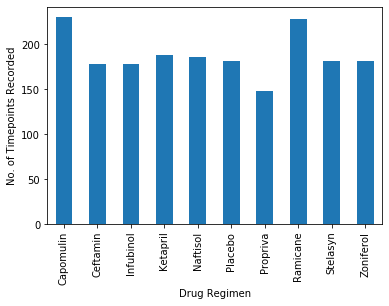

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count_by_drug = clean_combined.groupby('Drug Regimen')['Timepoint'].count()

# x_axis = np.arange(len(clean_combined['Drug Regimen'].unique()))
x_axis = np.arange(len(mice_count_by_drug))

ax = mice_count_by_drug.plot.bar(x=x_axis, y=mice_count_by_drug, rot=90)
ax.set_ylabel("No. of Timepoints Recorded")


Text(0.5, 0, 'Drug Regimen')

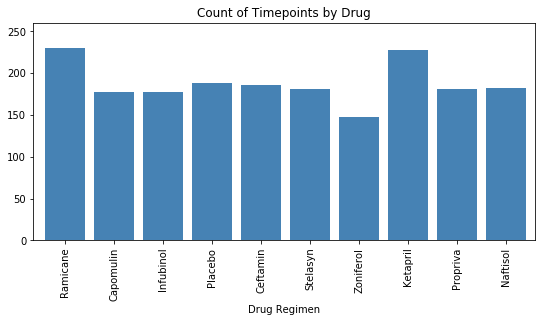

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_count_by_drug = clean_combined.groupby('Drug Regimen')['Timepoint'].count()

x_axis = np.arange(len(clean_combined['Drug Regimen'].unique()))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(x_axis[-1],4))
plt.bar(x_axis, mice_count_by_drug,color='steelblue',alpha=1.0,align="edge")
plt.xticks(tick_locations,clean_combined['Drug Regimen'].unique(), rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(mice_count_by_drug)+30)

# Set a Title and labels
plt.title("Count of Timepoints by Drug")
plt.xlabel("Drug Regimen")


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Sex')

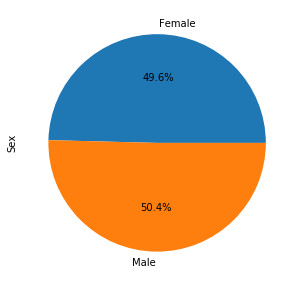

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_count_by_sex = clean_combined.groupby('Sex')['Mouse ID'].nunique()

print(mice_count_by_sex)

plot = mice_count_by_sex.plot.pie(y=mice_count_by_sex, autopct='%1.1f%%',figsize=(5,5))
plt.ylabel("Sex")



Text(0, 0.5, 'Sex')

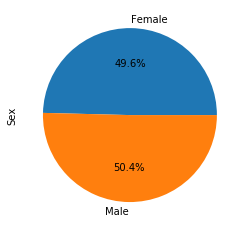

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_count_by_sex, labels=["Female","Male"], autopct="%1.1f%%")
plt.ylabel("Sex")

##### YLABEL only showing up after Kernal restart ######


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tumor_size = clean_combined.groupby('Mouse ID')['Timepoint'].max()
print(final_tumor_size)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# tumor_by_mouse = pd.merge(clean_combined,final_tumor_size, how='inner', left_on=['Mouse ID','Timepoint'], right_on=['Mouse ID','Timepoint'])
tumor_by_mouse = pd.merge(clean_combined,final_tumor_size, how='right', on=['Mouse ID','Timepoint'])
# print(tumor_by_mouse)

### Groupby including selected treatment regimens:
chosen_drug = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

chosen_drug_frame = tumor_by_mouse[tumor_by_mouse['Drug Regimen'].isin(chosen_drug)].reset_index(drop=True)

print(chosen_drug_frame)

# chosen_by_drug = tumor_by_mouse.groupby('Drug Regimen')### Need to Finish ###

#print(chosen_by_drug)


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
a401    45
a411    45
a444    45
a457    10
a492    45
a520    45
a577    30
a644    45
a685    45
a699    45
a788    30
a818    45
a897    45
a963    45
b128    45
b313    25
b447     0
b487    25
b559    45
b742    45
b759    30
b879    45
c139    45
c264    45
c282    45
c302    45
c326     5
c402    45
c458    30
c559    45
c580    30
c757    45
c758    45
c766    45
c819    40
c832    45
c895    30
c927    40
d133     0
d164    10
d251    45
d474    40
e213    45
e227    45
e291    25
e476    45
e584    45
e662    45
f129    15
f234    35
f278     5
f345    45
f394     5
f436    15
f545    45
f932     0
f966    20
f993    20
g107    35
g288    45
g296    45
g316    45
g497    45
g558    40
g570    45
g791    45
g867    15
h246    45
h333    30
h428     0
h531     5
i177    45
i334    45
i386    40
i477    10
i557    45
i635    45
i669    25
i738    45
i901    45
j119    45
j235    20
j246    35
j296    45
j365    45
j

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
chosen_drug = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_final = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in range(0,len(chosen_drug)):
    # chosen_drug_0 = []
    # chosen_drug_0.append(chosen_drug[drug])
    # Q1_0 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_0)]['Tumor Volume (mm3)'], 0.25)
    # Q3_0 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_0)]['Tumor Volume (mm3)'], 0.75)
    

    

    #------------------INCOMPLETE BELOW--------------------#

    # # BELOW Beginnings of a for loop method for creating a list of outliers to print at the end of each parent loop
    # outliers = []

    # for mouse in range(0,len(chosen_drug_frame)):
    #     if chosen_drug_frame.loc[chosen_drug_frame['Drug Regimen'] == drug,['Tumor Volume (mm3)']]:

    # # ABOVE Beginnings of a for loop method for creating a list of outliers to print at the end of each parent loop
    
    #--------------------------------------#
    
    # BELOW Attempt at creating outliers list - with assistance from tutor
    final_tumor_vol = chosen_drug_frame.loc[chosen_drug_frame['Drug Regimen'] == chosen_drug[drug], 'Tumor Volume (mm3)']
    # REMOVE BELOW - test print of final_tumor_vol #
    Q1_0 = final_tumor_vol.quantile(.25)
    Q3_0 = final_tumor_vol.quantile(.75)
    IQR_0 = Q3_0 - Q1_0
    Lower_0 = Q1_0 - (1.5*IQR_0)
    Upper_0 = Q3_0 + (1.5*IQR_0)
    

    # REMOVE ABOVE - test print of final_tumor_vol #
    tumor_vol_final.append(final_tumor_vol)    

    outliers = final_tumor_vol.loc[(final_tumor_vol<Lower_0)| (final_tumor_vol>Upper_0)]
    # ABOVE Attempt at creating outliers list - with assistance from tutor
    
    #-----------------INCOMPLETE ABOVE---------------------#
    
    print(f'For {chosen_drug[drug]}: Q1={Q1_0}, Q3={Q3_0}, IQR={IQR_0}, Lower={Lower_0}, Upper={Upper_0}   Outliers= {outliers}')



# Why are outliers not printing??
# Check final_tumor_vol code above - may not be producing the data expected
# IQR, etc seem to be working correctly
    

For Capomulin: Q1=32.37735684, Q3=40.1592203, IQR=7.781863460000004, Lower=20.70456164999999, Upper=51.83201549   Outliers= Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane: Q1=31.56046955, Q3=40.65900627, IQR=9.098536719999998, Lower=17.912664470000003, Upper=54.30681135   Outliers= Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol: Q1=54.04860769, Q3=65.52574285, IQR=11.477135160000003, Lower=36.83290494999999, Upper=82.74144559000001   Outliers= 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin: Q1=48.72207785, Q3=64.29983003, IQR=15.577752179999997, Lower=25.355449580000002, Upper=87.66645829999999   Outliers= Series([], Name: Tumor Volume (mm3), dtype: float64)


# Ignore next code block - attempt at previous code block without for loop


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
chosen_drug = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_final = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


# -------------------------- #
chosen_drug_0 = [chosen_drug[0]]
Q1_0 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_0)]['Tumor Volume (mm3)'], 0.25)
Q3_0 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_0)]['Tumor Volume (mm3)'], 0.75)
IQR_0 = Q3_0 - Q1_0

Lower_0 = Q1_0 - (1.5*IQR_0)
Upper_0 = Q3_0 + (1.5*IQR_0)

print(f'For {chosen_drug[0]}: Q1={Q1_0}, Q3={Q3_0}, IQR={IQR_0}, Lower={Lower_0}, Upper={Upper_0}')

# -------------------------- #
chosen_drug_1 = [chosen_drug[1]]
Q1_1 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_1)]['Tumor Volume (mm3)'], 0.25)
Q3_1 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_1)]['Tumor Volume (mm3)'], 0.75)
IQR_1 = Q3_1 - Q1_1

Lower_1 = Q1_1 - (1.5*IQR_1)
Upper_1 = Q3_1 + (1.5*IQR_1)

print(f'For {chosen_drug[1]}: Q1={Q1_1}, Q3={Q3_1}, IQR={IQR_1}, Lower={Lower_1}, Upper={Upper_1}')

# -------------------------- #
chosen_drug_2 = [chosen_drug[2]]
Q1_2 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_2)]['Tumor Volume (mm3)'], 0.25)
Q3_2 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_2)]['Tumor Volume (mm3)'], 0.75)
IQR_2 = Q3_2 - Q1_2

Lower_2 = Q1_2 - (1.5*IQR_2)
Upper_2 = Q3_2 + (1.5*IQR_2)


### TESTING - Not Working ###
# print(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_2)]['Tumor Volume (mm3)'])


# outlier_list_2 = [x for x in chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_2)]['Tumor Volume (mm3)'] if (
#         (x < Lower_2) & (x > Upper_2))]
# filtered_data_2 = chosen_drug_frame.loc[chosen_drug_frame['Drug Regimen'].isin(outlier_list_2)]
### TESTING - Not Working ###

print(f'For {chosen_drug[2]}: Q1={Q1_2}, Q3={Q3_2}, IQR={IQR_2}, Lower={Lower_2}, Upper={Upper_2}')
print(f"{chosen_drug_2}'s potential outliers: {filtered_data_2}")
# -------------------------- #
chosen_drug_3 = [chosen_drug[3]]
Q1_3 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_3)]['Tumor Volume (mm3)'], 0.25)
Q3_3 = np.quantile(chosen_drug_frame[chosen_drug_frame['Drug Regimen'].isin(chosen_drug_3)]['Tumor Volume (mm3)'], 0.75)
IQR_3 = Q3_3 - Q1_3

Lower_3 = Q1_3 - (1.5*IQR_3)
Upper_3 = Q3_3 + (1.5*IQR_3)

print(f'For {chosen_drug[3]}: Q1={Q1_3}, Q3={Q3_3}, IQR={IQR_3}, Lower={Lower_3}, Upper={Upper_3}')



for drug in chosen_drug:
    print(chosen_drug_frame.loc[chosen_drug_frame['Drug Regimen']==drug]['Tumor Volume (mm3)'])
    # tumor_vol_dict.add(drug,chosen_drug_frame.loc[chosen_drug_frame['Drug Regimen']==drug]['Tumor Volume (mm3)'])
    #count += 1





    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #### within each drug regimen find the above (IQR, 'Quantitatively determine potential outliers')
    


    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

For Capomulin: Q1=32.37735684, Q3=40.1592203, IQR=7.781863460000004, Lower=20.70456164999999, Upper=51.83201549
For Ramicane: Q1=31.56046955, Q3=40.65900627, IQR=9.098536719999998, Lower=17.912664470000003, Upper=54.30681135
For Infubinol: Q1=54.04860769, Q3=65.52574285, IQR=11.477135160000003, Lower=36.83290494999999, Upper=82.74144559000001


NameError: name 'filtered_data_2' is not defined

# Do not run previous code block

<function matplotlib.pyplot.show(*args, **kw)>

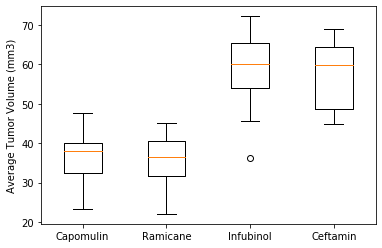

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_final,labels=chosen_drug)

plt.ylabel("Average Tumor Volume (mm3)")
plt.show


## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

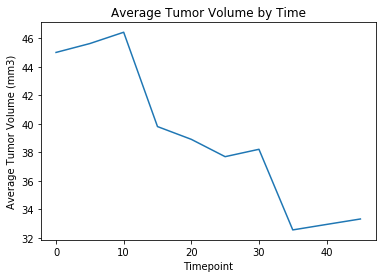

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_cap = clean_combined.loc[clean_combined['Mouse ID']=='m957']

plt.plot(mouse_cap['Timepoint'],mouse_cap['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Time")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

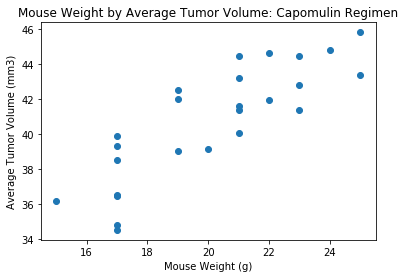

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_something = clean_combined.loc[clean_combined['Drug Regimen']=='Capomulin']

cap_somethingelse = cap_something.groupby('Mouse ID').mean()

plt.scatter(cap_somethingelse['Weight (g)'],cap_somethingelse['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight by Average Tumor Volume: Capomulin Regimen")
plt.show

## Correlation and Regression

<function matplotlib.pyplot.show(*args, **kw)>

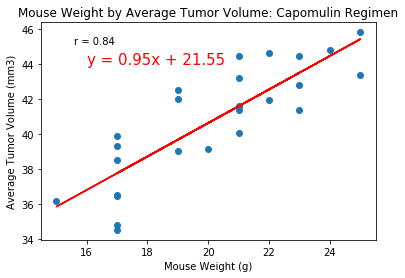

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(cap_somethingelse['Weight (g)'],cap_somethingelse['Tumor Volume (mm3)'])
# r,p=st.pearsonr(cap_somethingelse['Weight (g)'],cap_somethingelse['Tumor Volume (mm3)'])
# plt.annotate('r = {:.2f}'.format(r), xy=(0.1, 0.9), xycoords='axes fraction')
x_values = cap_somethingelse['Weight (g)']
y_values = cap_somethingelse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.annotate('r = {:.2f}'.format(rvalue), xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight by Average Tumor Volume: Capomulin Regimen")
plt.show

